#### Part 1 | Creating and Customizing Our First Plots

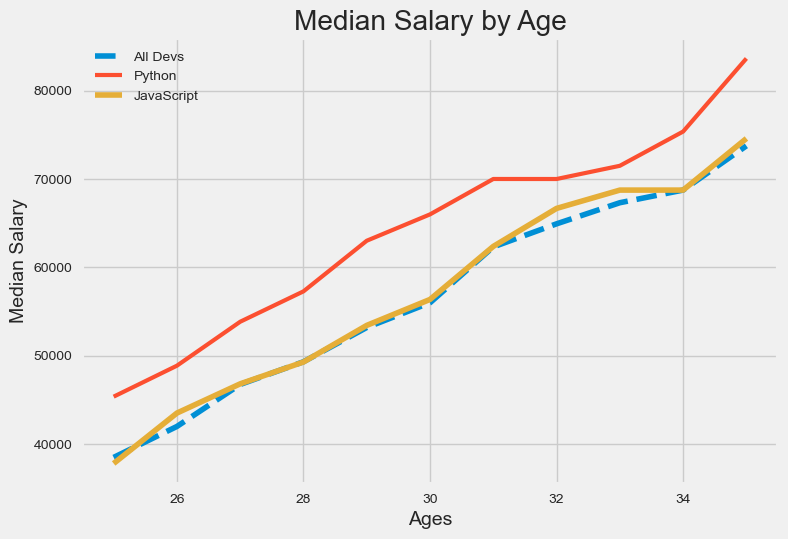

In [40]:
import matplotlib.pyplot as plt
import numpy as np
#print(plt.style.available)
# Median Developer Salaries by Age

plt.style.use('fivethirtyeight')
# plt.xkcd() # this makes the graph look like as a comic
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]



dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]
plt.plot(ages_x,dev_y, label = 'All Devs',linestyle='--')

# Median Python Developer Salaries by Age
py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]
plt.plot(ages_x,py_dev_y,linestyle = '-' ,label = 'Python',linewidth=3)

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]
plt.plot(ages_x,js_dev_y,label = 'JavaScript')




plt.title('Median Salary by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary')

plt.legend()
#plt.grid(True)
#plt.tight_layout()
#plt.savefig('plot.png') # save the plot as image
plt.show()


#### Part 2 | Bar Charts and Analyzing Data from CSVs

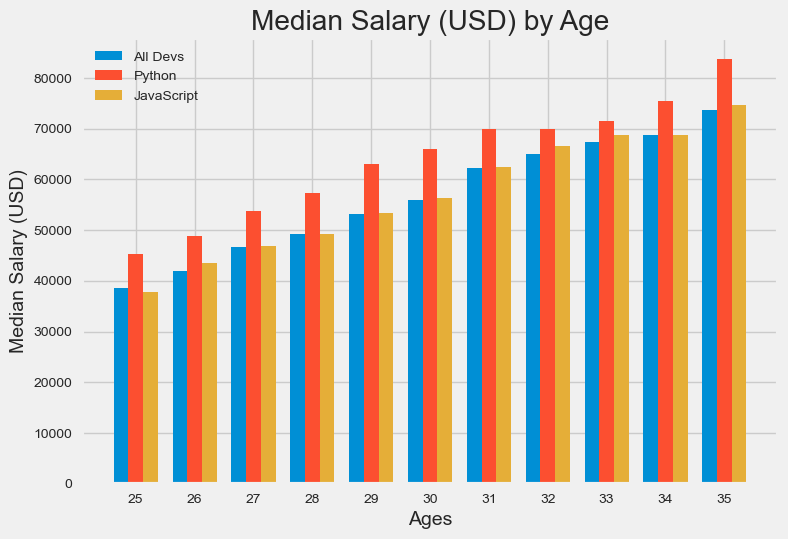

In [41]:
plt.style.use('fivethirtyeight')
x_indexes = np.arange(len(ages_x))
width = 0.25

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]
plt.bar(x_indexes - width,dev_y,width=width, label = 'All Devs')

# Median Python Developer Salaries by Age
py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]
plt.bar(x_indexes,py_dev_y,width=width,linestyle = '-' ,label = 'Python')

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]
plt.bar(x_indexes + width,js_dev_y,width=width,label = 'JavaScript')


plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.xticks(ticks=x_indexes,labels=ages_x)
plt.legend()
#plt.grid(True)
#plt.tight_layout()
#plt.savefig('plot.png') # save the plot as image
plt.show()

In [42]:
import pandas as pd
df = pd.read_csv('data.csv',index_col='Responder_id')
df.head()

,LanguagesWorkedWith
Responder_id,
1,HTML/CSS;Java;JavaScript;Python
2,C++;HTML/CSS;Python
3,HTML/CSS
4,C;C++;C#;Python;SQL
5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


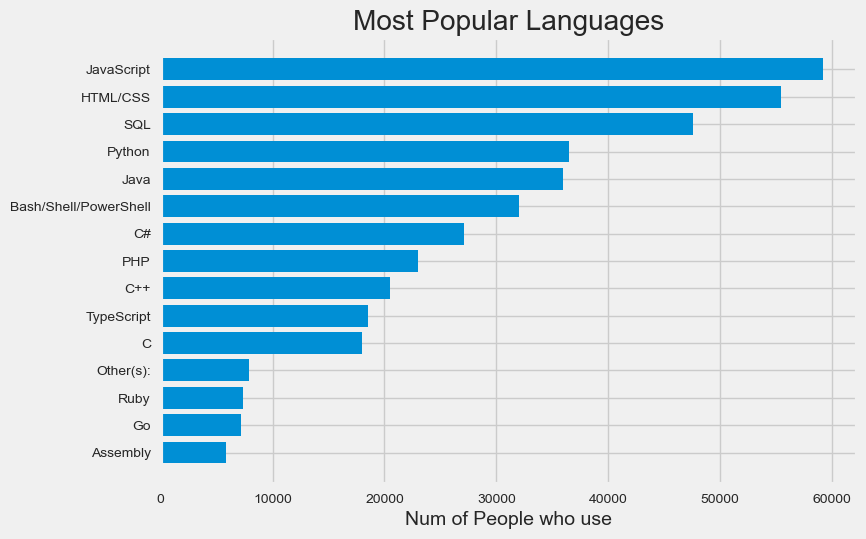

In [43]:
from collections import Counter
lang = df['LanguagesWorkedWith']
lang_counter = Counter()
for res in lang:
    lang_counter.update(res.split(';'))
popularity=[]
languages=[]
for item in lang_counter.most_common(15):
    popularity.append(item[1])
    languages.append(item[0])
languages.reverse()
popularity.reverse()
plt.barh(languages,popularity)
plt.title('Most Popular Languages')
# plt.ylabel('Programming Languages')
plt.xlabel('Num of People who use')
plt.show()

#### Part 3 | Pie Charts

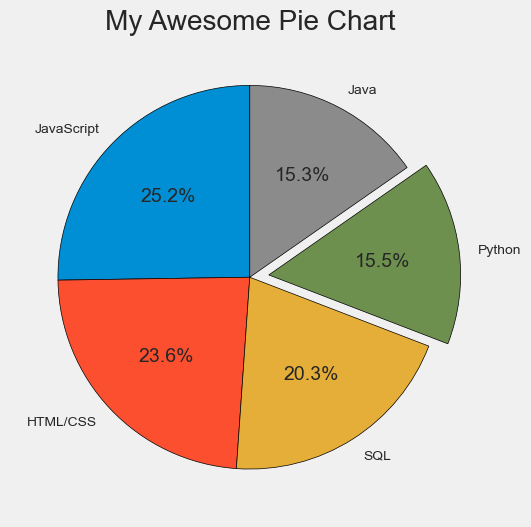

In [44]:
plt.style.use("fivethirtyeight")

slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
explode = [0, 0, 0, 0.1, 0]

plt.pie(slices, labels=labels, explode=explode, shadow=False,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("My Awesome Pie Chart")
plt.tight_layout()
plt.show()

#### Part 4 | Stack Plots

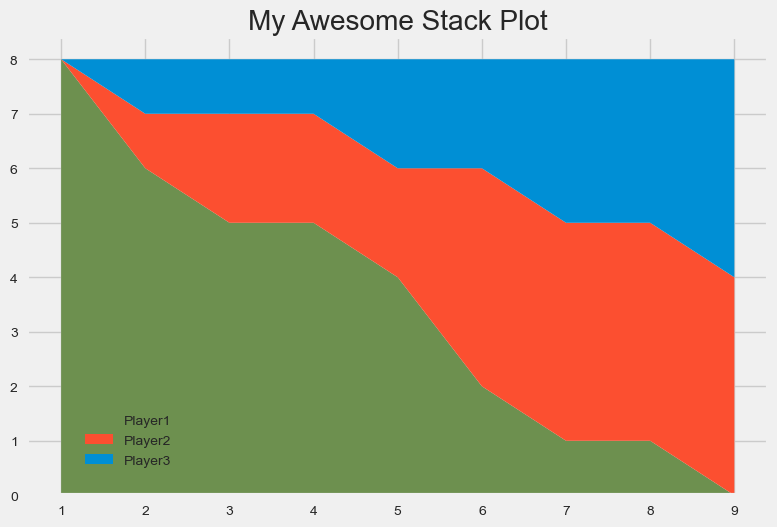

In [45]:
minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

player1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
player2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
player3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]

labels = ['Player1','Player2','Player3']
colors = ['#6d904f','#fc4f30','#008fd5']

plt.stackplot(minutes,player1,player2,player3,labels=labels,colors=colors)

plt.legend(loc=(0.07,0.05))

plt.title("My Awesome Stack Plot")
plt.tight_layout()
plt.show()

# Colors:
# Blue = #008fd5
# Red = #fc4f30
# Yellow = #e5ae37
# Green = #6d904f

#### Part 5 | Filling Area on Line Plots

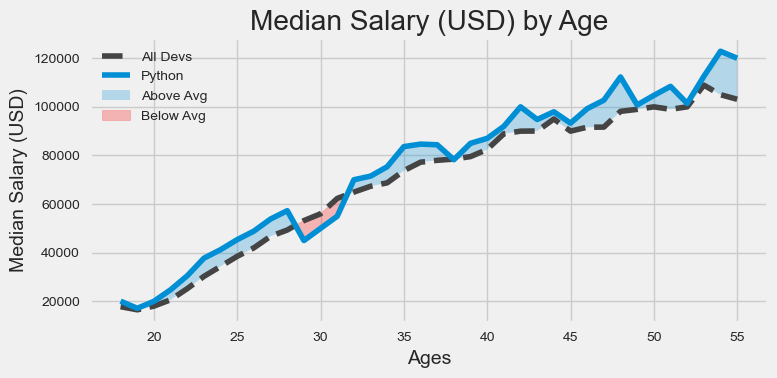

In [46]:
data = pd.read_csv('data2.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

plt.figure(figsize=(8,4))
plt.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')

plt.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries > dev_salaries),
                 interpolate=True, alpha=0.25, label='Above Avg')

plt.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries <= dev_salaries),
                 interpolate=True, color='red', alpha=0.25, label='Below Avg')

#overall_median = 57287

plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

#### Part 6 | Histograms

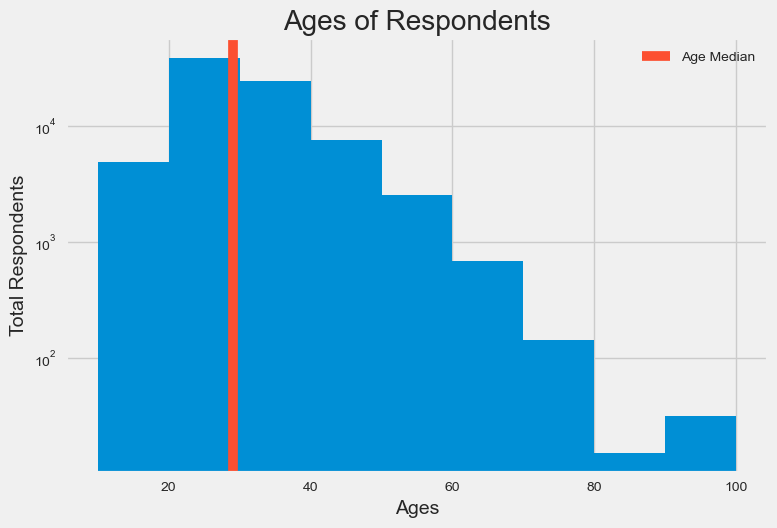

In [47]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')


data = pd.read_csv('data3.csv')

ids = data['Responder_id']
ages = data['Age']
bins=[10,20,30,40,50,60,70,80,90,100]

median_age = 29
color = '#fc4f30'

plt.hist(ages,bins=bins,log=True)
plt.axvline(median_age,color=color,label='Age Median',linewidth=7)
plt.legend()

plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')

plt.tight_layout()

plt.show()

#### Part 7 | Scatter Plots

C:\Users\a1mme\AppData\Local\Temp\ipykernel_6248\3392911099.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


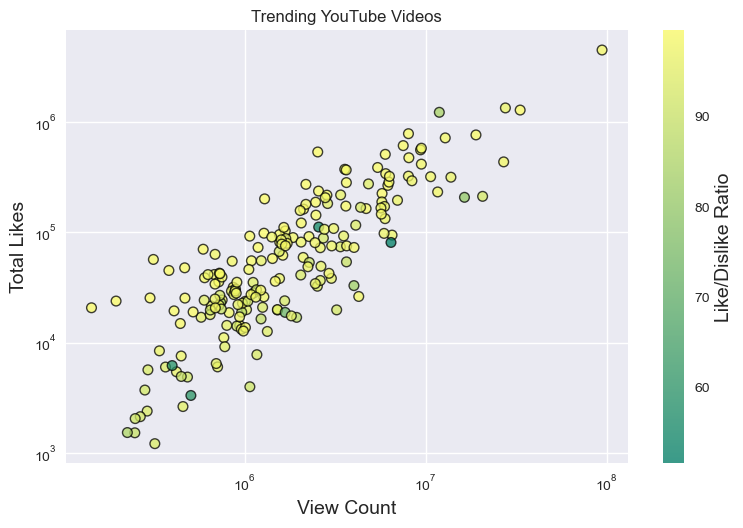

In [48]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

data = pd.read_csv('2019-05-31-data.csv')
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio']

plt.scatter(view_count, likes, c=ratio, cmap='summer',
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Like/Dislike Ratio')

plt.xscale('log')
plt.yscale('log')

plt.title('Trending YouTube Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes')

plt.tight_layout()

plt.show()

#### Part 8 | Plotting Time Series Data

C:\Users\a1mme\AppData\Local\Temp\ipykernel_6248\1595278388.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


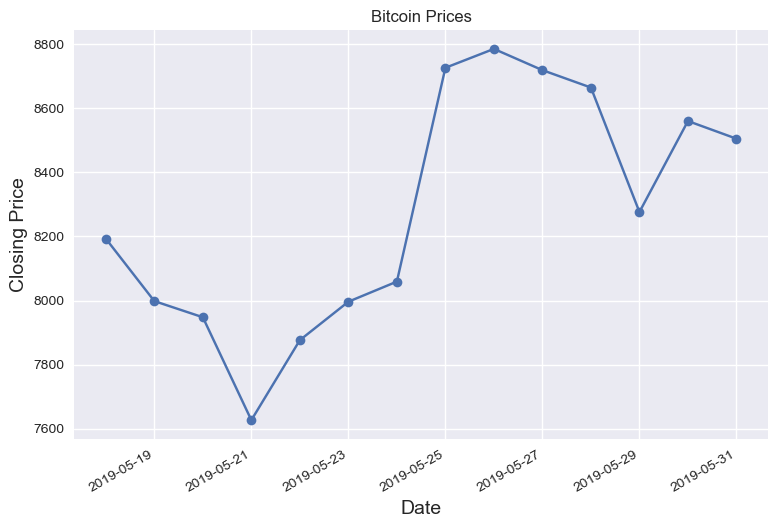

In [49]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')




#date_format = mpl_dates.DateFormatter('%b %d %Y')



#plt.gca().xaxis.set_major_formatter(date_format)

data = pd.read_csv('data4.csv')
price_date = data['Date']
price_close = data['Close']

price_date = pd.to_datetime(price_date)
data.sort_values('Date',inplace=True)

plt.plot_date(price_date,price_close,linestyle='solid')
plt.gcf().autofmt_xdate()

plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')

plt.tight_layout()

plt.show()

#### Part 9 | Plotting Live Data in Real-Time

In [50]:

import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

index = count()


def animate(i):
    data = pd.read_csv('data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    plt.cla()

    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')

    plt.legend(loc='upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()

C:\Users\a1mme\AppData\Local\Temp\ipykernel_6248\1511966627.py:30: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(plt.gcf(), animate, interval=1000)
c:\Users\a1mme\anaconda3\lib\site-packages\matplotlib\animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


<Figure size 800x550 with 0 Axes>

#### Part 10 | Subplots

C:\Users\a1mme\AppData\Local\Temp\ipykernel_6248\792380180.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


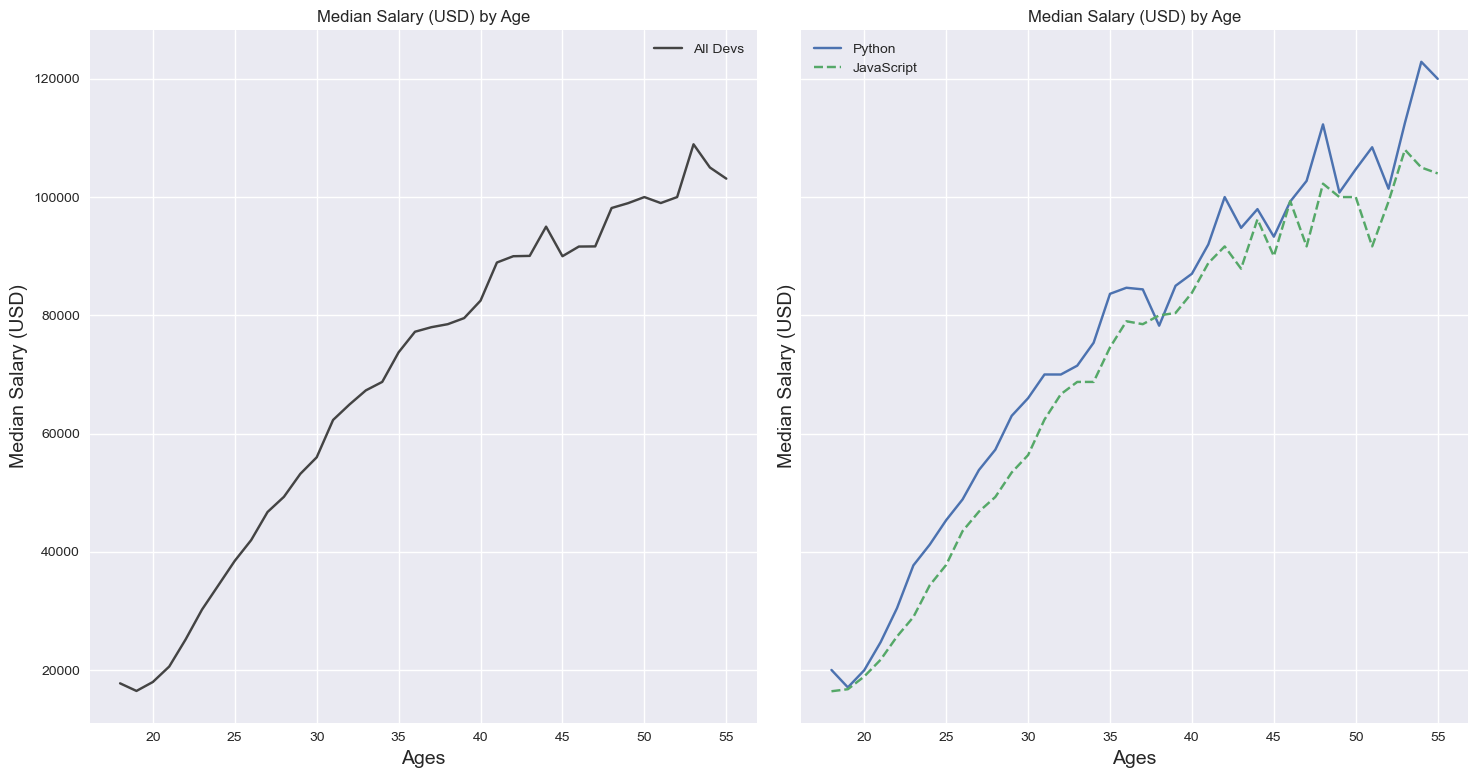

In [51]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')


data = pd.read_csv('data5.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(15,8))

ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries,linestyle='--', label='JavaScript')
ax1.plot(ages, dev_salaries, color='#444444',
          label='All Devs')

ax1.legend()

ax1.set_title('Median Salary (USD) by Age')
ax1.set_ylabel('Median Salary (USD)')
ax1.set_xlabel('Ages')
ax2.legend()

ax2.set_title('Median Salary (USD) by Age')
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')
plt.tight_layout()

plt.show()